# Dados

* Passageiro: Sequencial

* Sobreviveu: 0 - Não/1 - Sim

* Classe: 1 - Primeira Classe / 2 -Segunda Classe / 3 - Terceira Classe

* Nome: Nome do Passageiro

* Sexo: Sexo do Passageiro

* Idade: Idade do Passageiro

* Irmãos: Quantidade de irmao / Conjuges a bordo

* Pais: Quantidade de pais / Crianças a bordo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('datasets/DadosTitanic.xlsx', sheet_name=0)

df.head()

,Passageiro,Sobrevivente,Classe,Nome,Sexo,Idade,Irmãos,Pais,Tarifa
0,1,0,3,"Braund, Mr. Owen Harris",masculino,22.0,1,0,7.25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feminino,38.0,1,0,712833.00
2,3,1,3,"Heikkinen, Miss. Laina",feminino,26.0,0,0,7925.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feminino,35.0,1,0,53.10
4,5,0,3,"Allen, Mr. William Henry",masculino,35.0,0,0,8.05


In [3]:
df.columns

Index(['Passageiro', 'Sobrevivente', 'Classe', 'Nome', 'Sexo', 'Idade',
       'Irmãos', 'Pais', 'Tarifa'],
      dtype='object')

In [4]:
df.drop(axis=1, columns=['Passageiro'], inplace=True)

## Calculo da 'odds' para o grupo 'Sexo'

In [5]:
df.Classe = df.Classe.astype('category')
df.Classe

0      3
1      1
2      3
3      1
4      3
      ..
709    3
710    2
711    1
712    1
713    3
Name: Classe, Length: 714, dtype: category
Categories (3, int64): [1, 2, 3]

In [6]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

In [7]:
# Quantos sobreviveram e não sobreviveram
(df.Sobrevivente.value_counts() / df.shape[0]) * 100

0    59.383754
1    40.616246
Name: Sobrevivente, dtype: float64

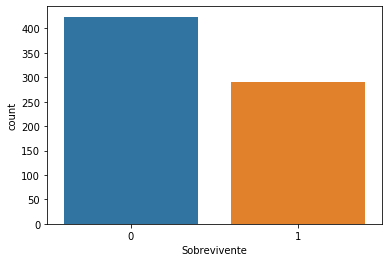

,values,n,perc
0,0,424,59.384
1,1,290,40.616


In [8]:
freq(df.Sobrevivente, plot=True)

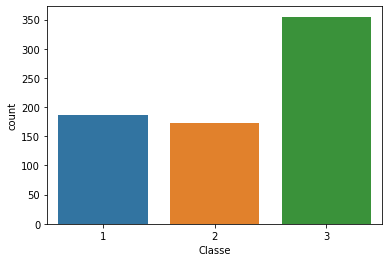

,values,n,perc
3,3,355,49.72
1,1,186,26.05
2,2,173,24.23


In [9]:
freq(df.Classe, plot=True)

In [10]:
df.Idade.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Idade, dtype: float64

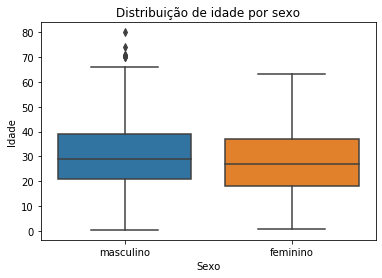

In [11]:
sns.boxplot(x='Sexo', y='Idade', data=df)
plt.title('Distribuição de idade por sexo')
plt.show()

### Modelando

In [12]:
import statsmodels.formula.api as os
import statsmodels.api as sm

result = os.glm(formula='Sobrevivente ~ Idade + Classe + Sexo', data=df, family=sm.families.Binomial()).fit()

print(result.summary())

Generalized Linear Model Regression Results                  
Dep. Variable:           Sobrevivente   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Sat, 29 Aug 2020   Deviance:                       647.28
Time:                        10:27:06   Pearson chi2:                     767.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7770      0.401      9.416     

### Analisando o modelo

* Pessoas que viajavam na segunda classe tinham menos chance de sobreviver do que quem viajava na primeira.

* Quem viajava na terceira classe possui menos chances ainda.

* Homens possuem menos chance de sobrevivência em relação as mulheres.

* Quanto mais velho, menores as chances de sobreviver.

In [13]:
print(np.exp(result.params[1:]))

Classe[T.2]          0.269874
Classe[T.3]          0.075727
Sexo[T.masculino]    0.080236
Idade                0.963690
dtype: float64


* Pessoas que viajavam na segunda classe tinham 0.27 das chances de sobrevivência com relação as pessoas da primeira classe.

* Pessoas da terceira classe, tinham 0.076 das chances que as pessoas da primeira classe tinham.

* Homens tinham 0.08 das chances das mulheres.

* Para cada ano a mais de sobrevivência o indivíduo fica com 0.96 das chances de outro individuo com um ano a menos.

In [14]:
print((np.exp(result.params[1:]) - 1))

Classe[T.2]         -0.730126
Classe[T.3]         -0.924273
Sexo[T.masculino]   -0.919764
Idade               -0.036310
dtype: float64


Analisando em termos percentuais relativos de chance:

* Pessoas da segunda classe tem 73% menos chances de sobrevivência do que pessoas da primeira classe.

* Pessoas da terceira classe tem 92% menos chances de sobrevivência que pessoas da primeira classe.

* Homens tem 92% menos chance de sobrevivência do que mulheres.

* Para cada ano a mais de idade, as chances diminuem em 3.63%.

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

baseline_df = df[['Sobrevivente', 'Classe', 'Sexo', 'Idade']].dropna()
y = baseline_df['Sobrevivente']
X = pd.get_dummies(baseline_df[['Classe', 'Sexo', 'Idade']], drop_first=True)
X.head()

,Idade,Classe_2,Classe_3,Sexo_masculino
0,22.0,0,1,1
1,38.0,0,0,0
2,26.0,0,1,0
3,35.0,0,0,0
4,35.0,0,1,1


In [16]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(model.coef_[0])
print(model.intercept_)

[-0.03376644 -1.10095542 -2.32311667 -2.38595504]
[3.42921197]


In [18]:
y_pred = model.predict(X)

In [34]:
# Probabilidade de ocorrer a classe 1 (sobreviveu) em %
model.predict_proba([[29,0,1,1]])[:,1]*100

array([9.4568571])

In [45]:
e = model.intercept_[0] + np.sum(model.coef_[0] * np.array([29,0,1,1]))
(np.exp(e) / (1 + np.exp(e))) * 100

9.456857098897496

### Métricas

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

print(confusion_matrix(y, y_pred))

[[359  65]
 [ 85 205]]


In [20]:
pd.crosstab(y, y_pred)

col_0,0,1
Sobrevivente,,
0,359,65
1,85,205


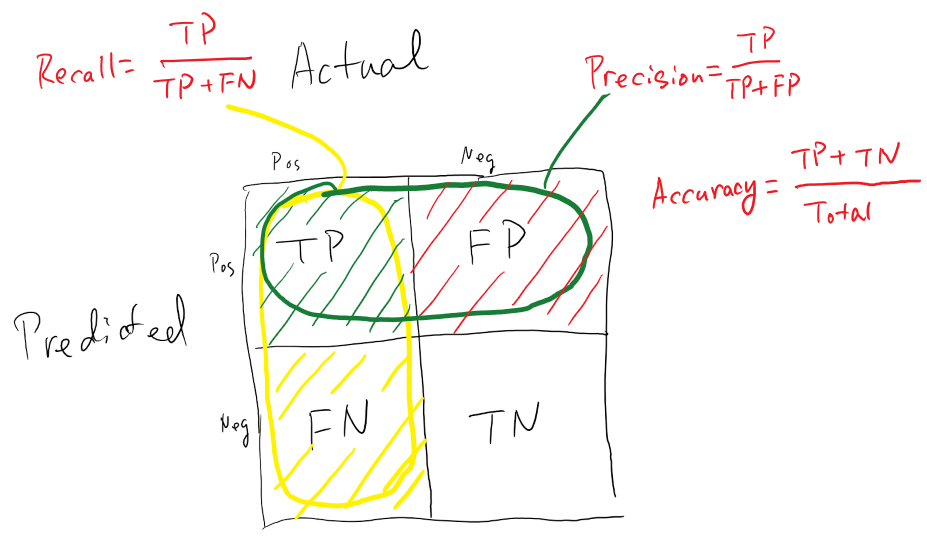

In [21]:
from IPython.display import Image
Image('Imagens/Imagem0003.png')

#### Acurácia: Percentual total de acertos

In [22]:
acuracia = accuracy_score(y, y_pred)
print('O modelo obteve %0.4f de acurácia' % acuracia)

O modelo obteve 0.7899 de acurácia


In [23]:
print(classification_report(y, y_pred))

precision    recall  f1-score   support

           0       0.81      0.85      0.83       424
           1       0.76      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



In [24]:
print('AUC: %0.2f' % roc_auc_score(y, model.predict_proba(X)[:,1]))

AUC: 0.85


In [25]:
def plot_roc_curver(y_true, y_pred, fig_size = (10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=fig_size)
    auc_value = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, color = 'orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

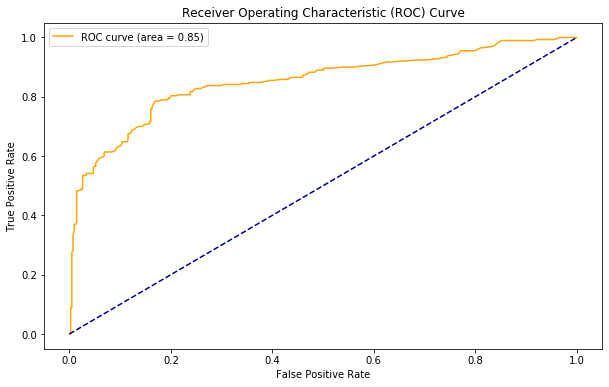

In [26]:
plot_roc_curver(y, model.predict_proba(X)[:,1])

### Previsão


In [27]:
eu = pd.DataFrame({'Idade': 29, 'Classe_2': 0, 'Classe_3': 0, 'Sexo_masculino': 1}, index=[0])
minha_prob = model.predict_proba(eu)
print(minha_prob)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no titanic'.format(round(minha_prob[:,1][0] * 100, 2)))

[[0.48399789 0.51600211]]
Eu teria 51.6% de probabilidade de sobrevivência se estivesse no titanic


In [28]:
outro = pd.DataFrame({'Idade': 26, 'Classe_2': 0, 'Classe_3': 0, 'Sexo_masculino': 0}, index=[0])
outra_prod = model.predict_proba(outro)
print(outra_prod)
print('Ela teria {}% de probabilidade de sobrevivência se estivesse no titanic'.format(round(outra_prod[:,1][0] * 100, 2)))

[[0.07234023 0.92765977]]
Ela teria 92.77% de probabilidade de sobrevivência se estivesse no titanic
